In [1]:
import tensorflow.keras.datasets.cifar10
import numpy as np
import matplotlib.pyplot as plt
import random  
import time

from tensorflow.keras.models import Sequential 

from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras import utils    
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

## Check if GPU is able to be used

In [2]:
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Data prep
We verdelen de dataset in een train- en test set in de juiste shapes

In [4]:
(X_train, Y_train), (X_test, Y_test) = tensorflow.keras.datasets.cifar10.load_data()

print("x_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("x_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [5]:
nb_classes = 10 # Er zijn tien verschillende klasses

Y_train = utils.to_categorical(Y_train, nb_classes)
Y_test = utils.to_categorical(Y_test, nb_classes)

print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

Y_train: (50000, 10), Y_test: (10000, 10)


## Model

In [6]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

# Conv Layer 3
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Dropout(0.1))
model.add(Activation('relu'))

# Fully Connected Layer 4
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.02)))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        3

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fit_data = model.fit(X_train, Y_train,
                    batch_size=128,  # Kan op 64 gezet worden, hetzelfde resultaat, maar langzamer
                    epochs=25,  # Meer dan 25 epochs schijnt niet veel effect meer te hebben
                    verbose=1,
                    validation_split=0.1)  # Laat trainingsvoorbeelden in een ander patroon zien, vookom overfitting

Epoch 1/25
352/352 [==============================] - 6s 10ms/step - loss: 1.9159 - accuracy: 0.4034 - val_loss: 1.3855 - val_accuracy: 0.5736
Epoch 2/25
352/352 [==============================] - 3s 7ms/step - loss: 1.2534 - accuracy: 0.6151 - val_loss: 1.2176 - val_accuracy: 0.6386
Epoch 3/25
352/352 [==============================] - 3s 7ms/step - loss: 1.1252 - accuracy: 0.6707 - val_loss: 1.0691 - val_accuracy: 0.6930
Epoch 4/25
352/352 [==============================] - 3s 7ms/step - loss: 1.0636 - accuracy: 0.6948 - val_loss: 1.0530 - val_accuracy: 0.6928
Epoch 5/25
352/352 [==============================] - 3s 7ms/step - loss: 1.0163 - accuracy: 0.7149 - val_loss: 1.0904 - val_accuracy: 0.6886
Epoch 6/25
352/352 [==============================] - 3s 7ms/step - loss: 0.9795 - accuracy: 0.7293 - val_loss: 1.1483 - val_accuracy: 0.6722
Epoch 7/25
352/352 [==============================] - 3s 7ms/step - loss: 0.9493 - accuracy: 0.7379 - val_loss: 1.0146 - val_accuracy: 0.7224
Epoch

## Evaluatie

In [9]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0676 - accuracy: 0.7319
Test loss: 1.0676
Test accuracy: 0.7319


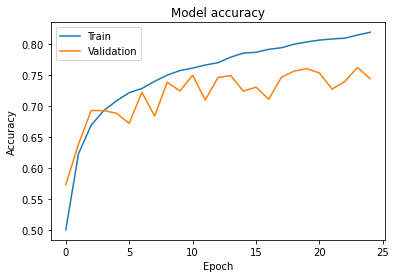

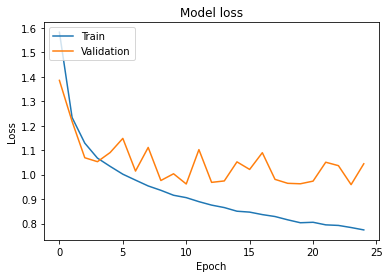

In [10]:
plt.plot(fit_data.history['accuracy'])
plt.plot(fit_data.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(fit_data.history['loss'])
plt.plot(fit_data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusie

Ik ben uiteindelijk op een accuracy van ongeveer 75% gekomen met 3 convolutionele layers en 1 fully connected layer.

Aan de grafieken te zien overfit het model nog wel een beetje zoals te zien is aan de oranje lijn vaak wel onder de blauwe lijn ligt. Ik heb erg veel geprobeerd om mijn model niet te laten overfitten zoals meerdere maxpools, dropouts, en hogere waardes voor de L2 regularisatie. Ook heb ik andere optimizers en activatiefuncties gebruikt. Uiteindelijk besloot ik toch te blijven bij wat we in de basis al hadden qua lossberekening, optmizer, aantal layers, etc. 

ReLU activatiefuncties bleken het beste te werken vergelegen met tanh, sigmoid, selu en elu.

Ik heb gebruik gemaakt van een MaxPool van 2x2 om eventuele belangrijke features of patronen te vinden. Meer/geen maxpools gaf een lagere testscore.

In de laatste twee layers maak ik gebruik van een dropout om overfitten tegen te gaan. Twee layers bleek een betere score te geven dan één.

Ik heb in de fully connected layer L2 regularisatie toegepast. Dit past de de berekening van de loss functie aan.

Voor L1 regularisatie: `loss = L1 * reduce_sum(abs(x))`

Voor L2 regularisatie: `loss = L2 * reduce_sum(square(x))`

Tn slotte heb ik bij het trainen gekozen om een parameter `validation_split=0.1` mee te geven, dit is zodat het model telkens data in een ander patroon krijgt te zien, en dus niet overfit.